<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-03-28 03:53:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  65.2MB/s    in 2.3s    

2025-03-28 03:53:04 (65.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



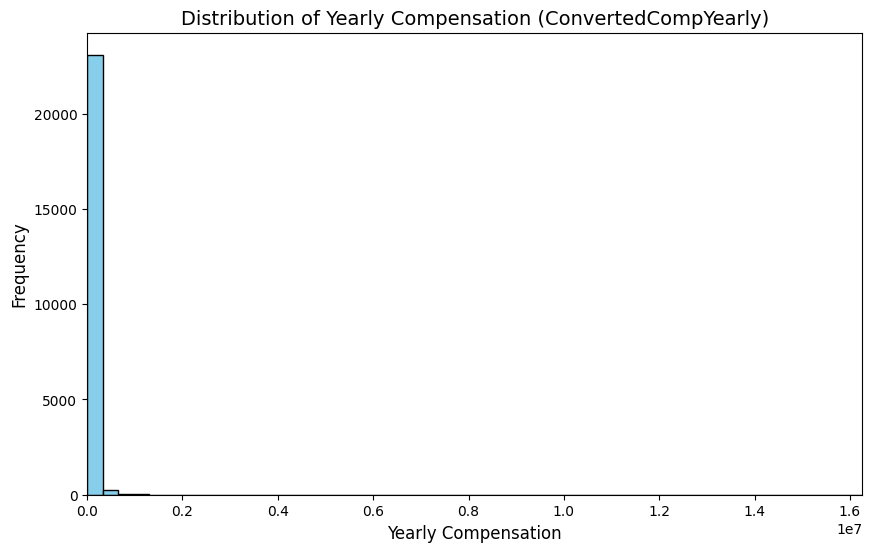

In [7]:
# Task 1: Visualizing Data Distributions - Histogram of ConvertedCompYearly

# Create the histogram
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, color='skyblue', edgecolor='black')

# Set the X-axis limits to focus on a reasonable range
plt.xlim(0, df['ConvertedCompYearly'].max())  # Adjust the upper limit based on your data

# Adding labels and title
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xlabel('Yearly Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()



##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



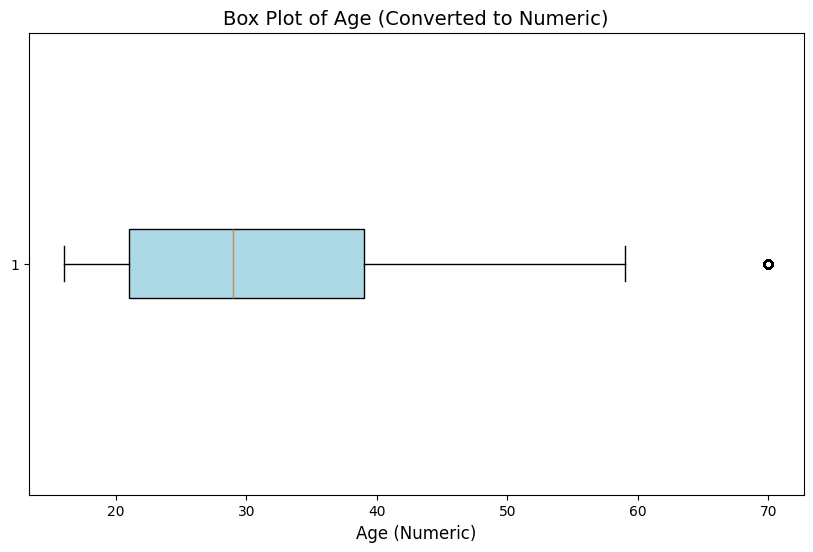

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data - make sure to load your dataset here
# df = pd.read_csv('survey-data.csv')

# Create a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 16,  # Example midpoint
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Apply the mapping to the 'Age' column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Create the box plot
plt.figure(figsize=(10,6))
plt.boxplot(df['Age_numeric'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))

# Adding labels and title
plt.title('Box Plot of Age (Converted to Numeric)', fontsize=14)
plt.xlabel('Age (Numeric)', fontsize=12)

# Display the plot
plt.show()



### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



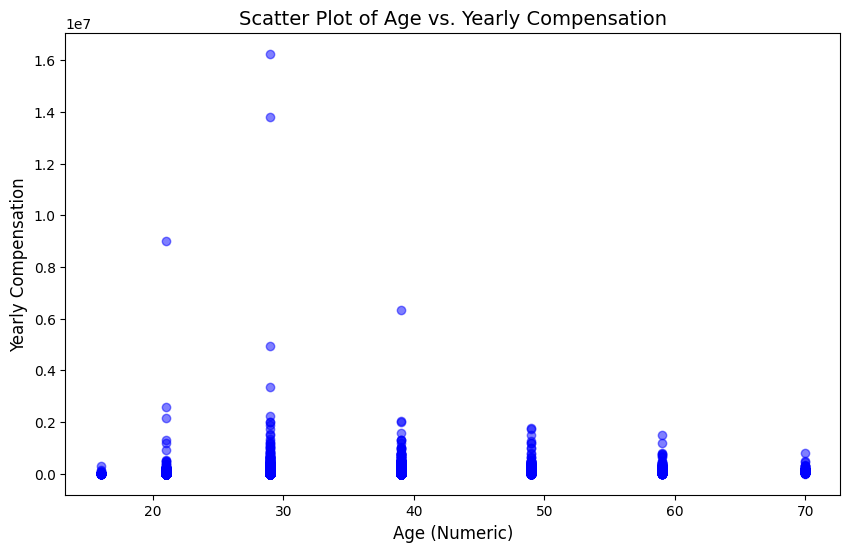

In [10]:
import matplotlib.pyplot as plt

# Task 2.1: Scatter Plot of Age_numeric and ConvertedCompYearly
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(df['Age_numeric'], df['ConvertedCompYearly'], alpha=0.5, color='b')

# Adding labels and title
plt.title('Scatter Plot of Age vs. Yearly Compensation', fontsize=14)
plt.xlabel('Age (Numeric)', fontsize=12)
plt.ylabel('Yearly Compensation', fontsize=12)

# Display the plot
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


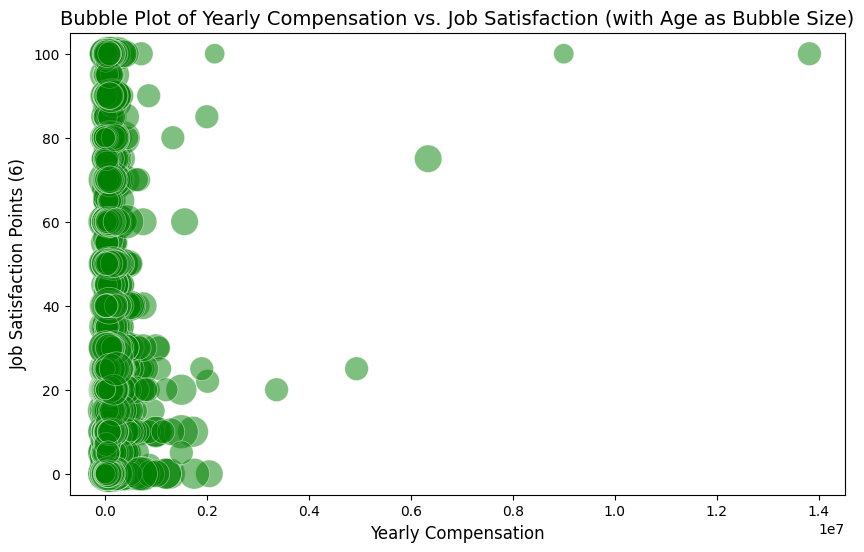

In [11]:
# Task 2.2: Bubble Plot of ConvertedCompYearly and JobSatPoints_6 with Age_numeric as Bubble Size
plt.figure(figsize=(10,6))

# Bubble plot
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], 
            s=df['Age_numeric'] * 10,  # Scale the bubble size by Age_numeric
            alpha=0.5, color='g', edgecolors="w", linewidth=0.5)

# Adding labels and title
plt.title('Bubble Plot of Yearly Compensation vs. Job Satisfaction (with Age as Bubble Size)', fontsize=14)
plt.xlabel('Yearly Compensation', fontsize=12)
plt.ylabel('Job Satisfaction Points (6)', fontsize=12)

# Display the plot
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



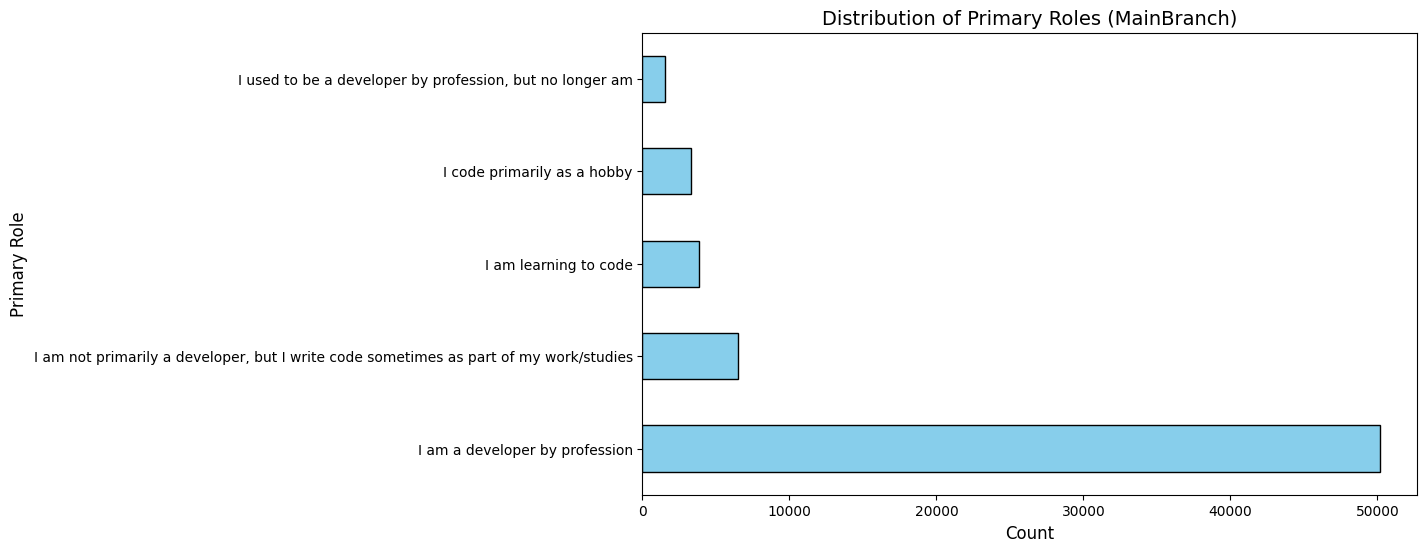

In [12]:
# Task 3.1: Horizontal Bar Chart of MainBranch Distribution

plt.figure(figsize=(10,6))

# Create the horizontal bar chart
df['MainBranch'].value_counts().plot(kind='barh', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Primary Roles (MainBranch)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Primary Role', fontsize=12)

# Display the plot
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



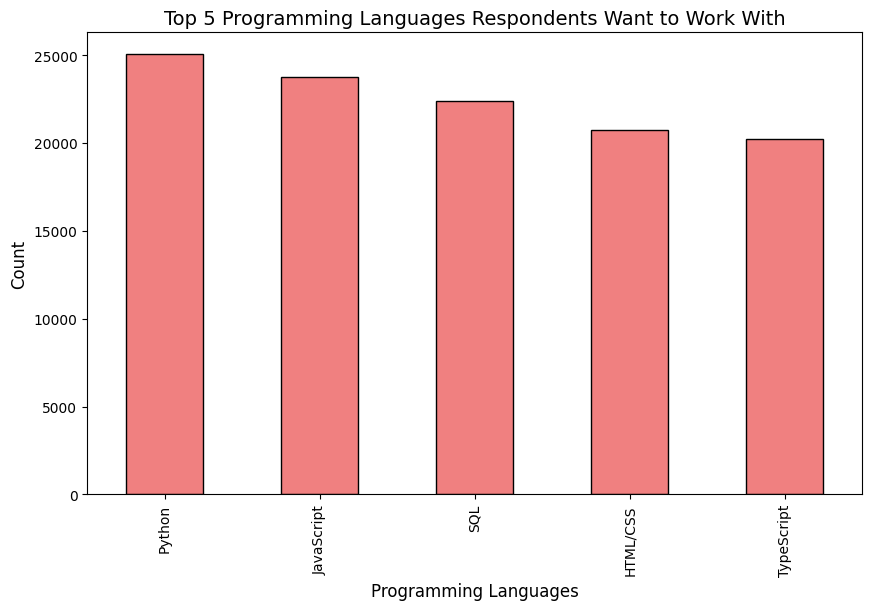

In [13]:
# Task 3.2: Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With

# First, get the count of each programming language respondents want to work with
languages_count = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

# Get the top 5 languages
top_5_languages = languages_count.head(5)

# Create the vertical bar chart
plt.figure(figsize=(10,6))
top_5_languages.plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding labels and title
plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=14)
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


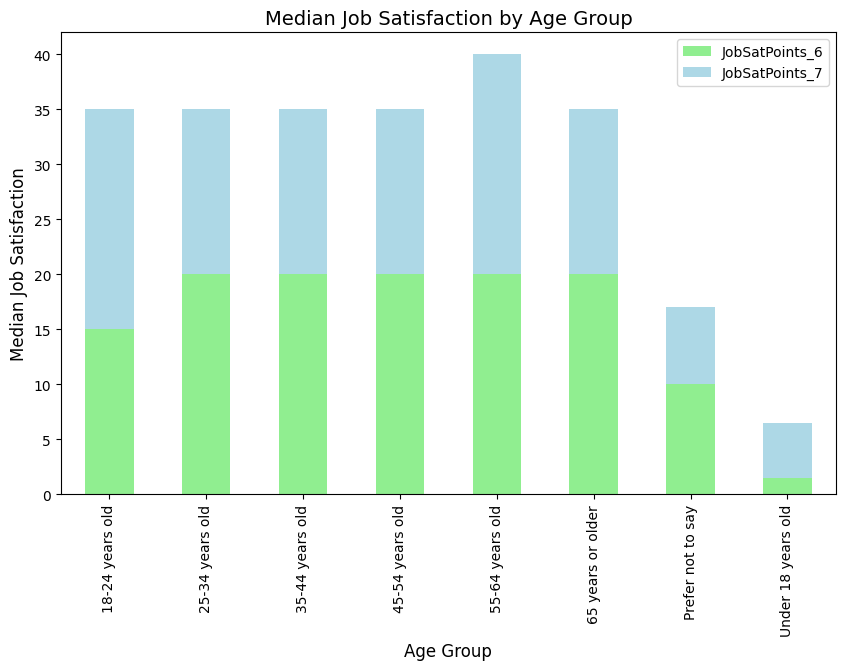

In [15]:
# Task 3.3: Stacked Bar Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group

# Group by Age and calculate the median for JobSatPoints_6 and JobSatPoints_7
median_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create the stacked bar chart
median_job_sat.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightgreen', 'lightblue'])

# Adding labels and title
plt.title('Median Job Satisfaction by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)

# Display the plot
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



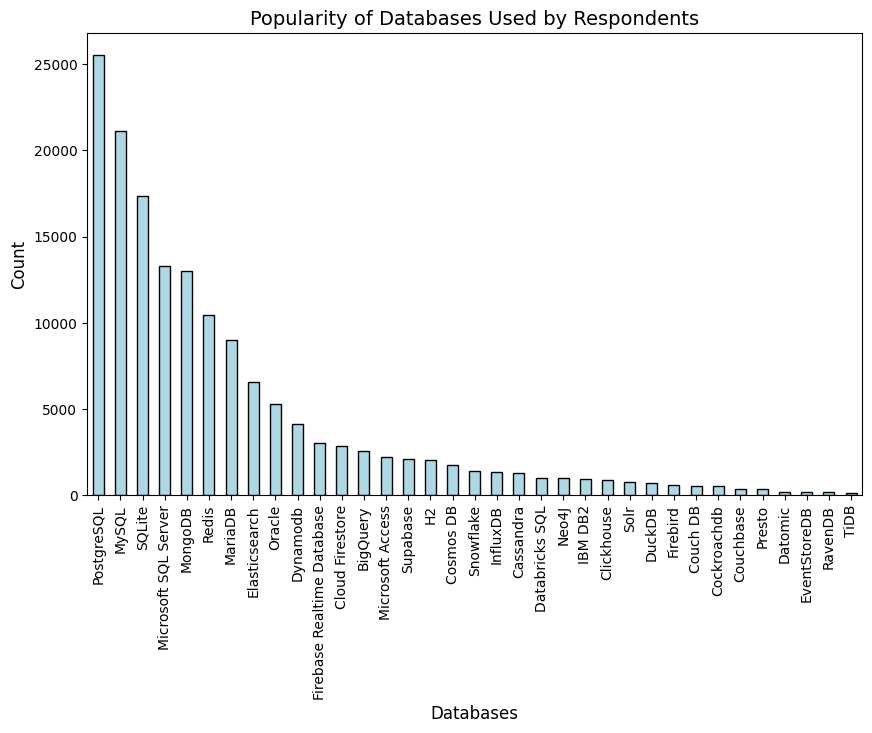

In [16]:
# Task 3.4: Bar Chart of Database Popularity (DatabaseHaveWorkedWith)

# First, split the databases in 'DatabaseHaveWorkedWith' and flatten the list into individual entries
databases_count = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()

# Create the bar chart
plt.figure(figsize=(10,6))
databases_count.plot(kind='bar', color='lightblue', edgecolor='black')

# Adding labels and title
plt.title('Popularity of Databases Used by Respondents', fontsize=14)
plt.xlabel('Databases', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



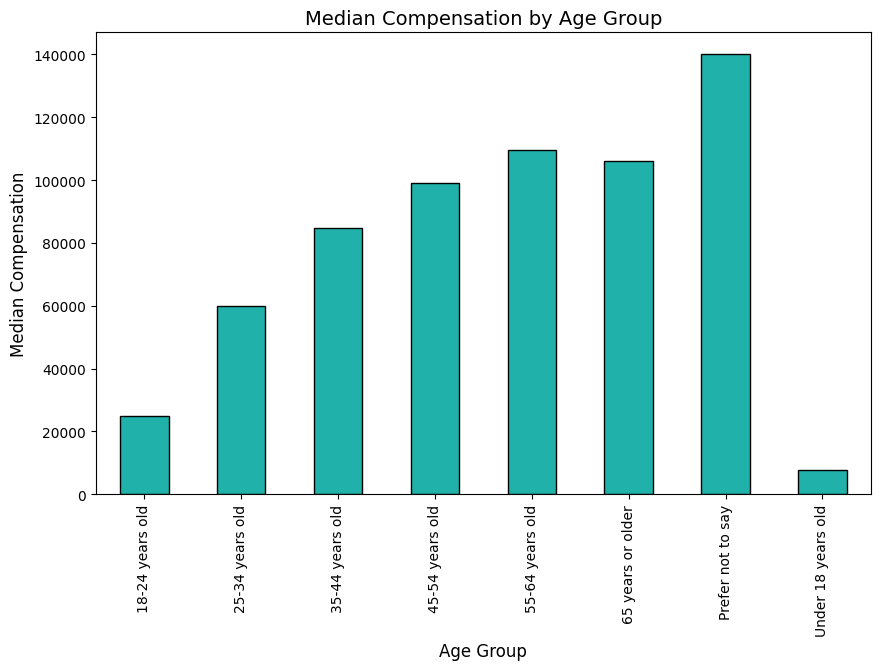

In [18]:
# Task 4.1: Grouped Bar Chart of Median ConvertedCompYearly for Different Age Groups

# Define the age categories if not already done
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
              '45-54 years old', '55-64 years old', '65 years or older']

# Map Age to Numeric values (if not already done)
df['Age_numeric'] = df['Age'].map(age_mapping)

# Group by Age and calculate the median of ConvertedCompYearly
median_compensation_by_age = df.groupby('Age')['ConvertedCompYearly'].median()

# Create the grouped bar chart
plt.figure(figsize=(10,6))
median_compensation_by_age.plot(kind='bar', color='lightseagreen', edgecolor='black')

# Adding labels and title
plt.title('Median Compensation by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation', fontsize=12)

# Display the plot
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



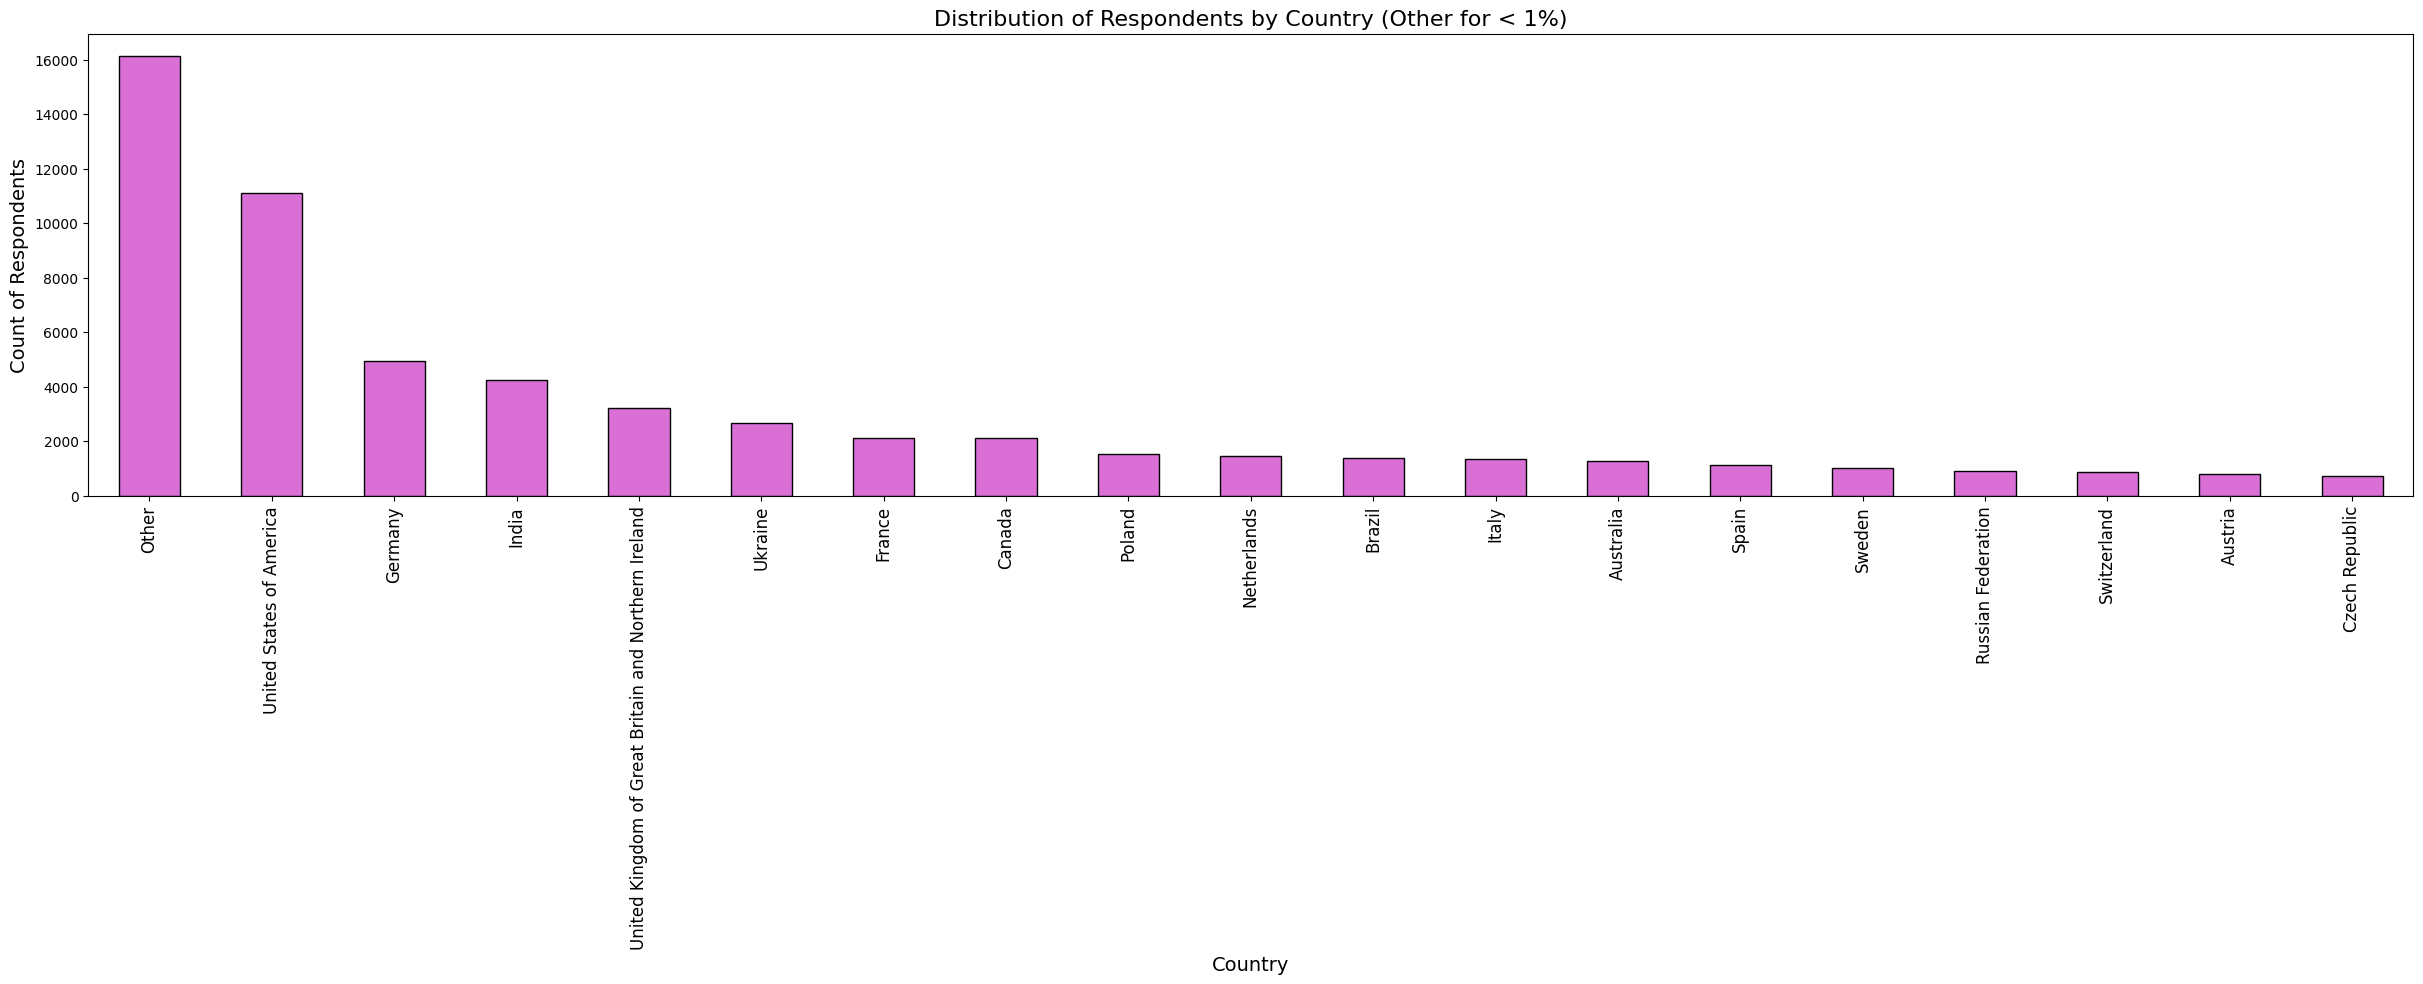

In [23]:
# Task 4.2: Bar Chart of Respondent Count by Country with 'Other' Category for Countries with < 1%

# Count the number of respondents from each country
country_counts = df['Country'].value_counts()

# Calculate the total number of respondents
total_respondents = len(df)

# Calculate the percentage of respondents from each country
country_percentage = (country_counts / total_respondents) * 100

# Identify countries with less than 1% of the total respondents
countries_to_combine = country_percentage[country_percentage < 1].index

# Replace countries with less than 1% with 'Other'
df['Country_updated'] = df['Country'].replace(countries_to_combine, 'Other')

# Count the number of respondents from each updated country category
updated_country_counts = df['Country_updated'].value_counts()

# Create the bar chart with a wider figure
plt.figure(figsize=(30,6))  # Increase the width of the figure to make space for the labels
updated_country_counts.plot(kind='bar', color='orchid', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Respondents by Country (Other for < 1%)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Respondents', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels and adjust font size for readability

# Display the plot
plt.show()



### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
